# Análisis de Datos

### Importación de módulos

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.rcParams.update({'font.size': 18}) 

### Lectura de datasets

In [2]:
rating = pd.read_csv('rating.csv')

In [3]:
anime = pd.read_csv('anime.csv', sep = ';', decimal = ',', na_values = 'Unknown')

### Primeros registros

In [4]:
rating.head(5)

user_id  anime_id  rating
0        1        20      -1
1        1        24      -1
2        1        79      -1
3        1       226      -1
4        1       241      -1

In [5]:
anime.head(5)

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type  episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie       1.0    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV      64.0    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0    9.25   
3                                   Sci-Fi, Thriller     TV      24.0    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266

### Pre- análisis de los datos

In [6]:
rating.describe()

user_id      anime_id        rating
count  7.813737e+06  7.813737e+06  7.813737e+06
mean   3.672796e+04  8.909072e+03  6.144030e+00
std    2.099795e+04  8.883950e+03  3.727800e+00
min    1.000000e+00  1.000000e+00 -1.000000e+00
25%    1.897400e+04  1.240000e+03  6.000000e+00
50%    3.679100e+04  6.213000e+03  7.000000e+00
75%    5.475700e+04  1.409300e+04  9.000000e+00
max    7.351600e+04  3.451900e+04  1.000000e+01

In [7]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
user_id     int64
anime_id    int64
rating      int64
dtypes: int64(3)
memory usage: 178.8 MB


* Observando a grandes rasgos, se observa que el dataset 'rating' posee tres columnas correspondientes a Id del usuario, el id del animé y el rating que dejó dicho usuario para el animé en cuestión. 

* El dataset cuenta con aproximadamente 8 millones de registros yno presenta valores nulos.

* Se observa que la valoración máxima y mínima otorgada por los usuarios son de 10 y -1, donde -1 indica que el usuario no valoró el animé.

In [8]:
anime.describe()

anime_id      episodes        rating       members
count  12294.000000  11954.000000  12064.000000  1.229400e+04
mean   14058.221653     12.382550      6.473902  1.807134e+04
std    11455.294701     46.865352      1.026746  5.482068e+04
min        1.000000      1.000000      1.670000  5.000000e+00
25%     3484.250000      1.000000      5.880000  2.250000e+02
50%    10260.500000      2.000000      6.570000  1.550000e+03
75%    24794.500000     12.000000      7.180000  9.437000e+03
max    34527.000000   1818.000000     10.000000  1.013917e+06

In [9]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
anime_id    12294 non-null int64
name        12294 non-null object
genre       12247 non-null object
type        12269 non-null object
episodes    11954 non-null float64
rating      12064 non-null float64
members     12294 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 528.3+ KB


* Por otra parte el dataset 'anime' contiene información de cada animé distribuidos en 7 columnas: el id del animé, su nombre, el o los géneros al cuál pertenece, el tipo o formato,el número de episodios, el rating promedio de su comunidad, y el número de miembros de su comunidad.

* Se observa que el mayor número de episodios es de 1818 episodios!!! y la menor cantidad de éstos es de 1, pudiendo referirse éstos a películas o música. A su vez el promedio de episodios es de 12 episodios aproximadamente.

* Respecto al rating promedio se osbserva que el máximo es de 10, que generalmente se atribuyen a animés evaluados por una sola persona, mientras que el pormedio mínimo es de 1,67. El pormedio del rating promedio, es de 6,7 puntos.

* Respecto a las comunidades por animé, el tamaño menor está compuesto por 5 miebros, mientras que la mayor comunidad cuenta con más de un millón de personas, siendo el pormedio alrededor de 18.000 personas.

* Se puede observar presencia de missings values en este dataset, por lo que debemos trabajarlo, para evitar inconsistencias y errores futuros.

### Datos Perdidos

In [10]:
from missingno import matrix

<Figure size 504x216 with 0 Axes>

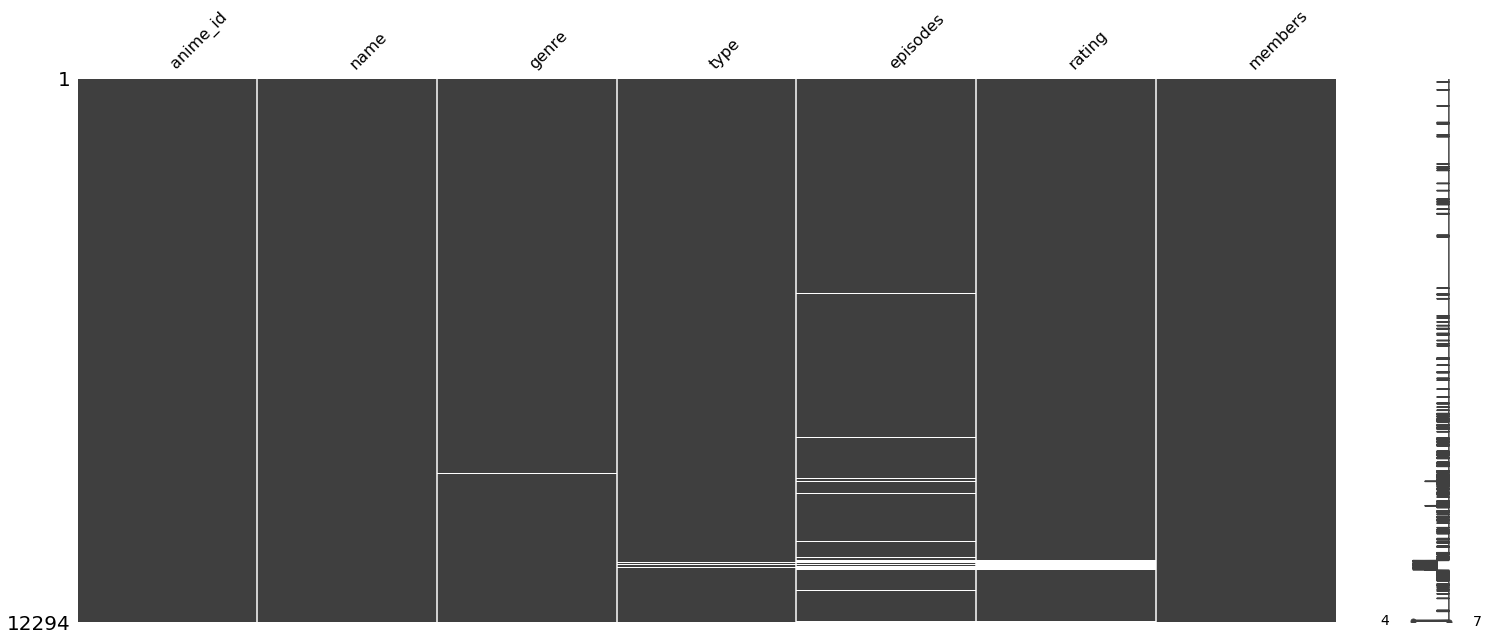

In [11]:
plt.figure(figsize = (7,3))
matrix(anime)

* Como se puede observar en la repsentación gráfica de valores perdidos, las columnas genre, type, episodes y rating cuentan con missing values.

### Eliminación de valores nulos

In [12]:
rating = rating.dropna()

In [13]:
anime = anime.dropna()

In [14]:
len(anime)

11830

In [15]:
proporcion = 11830/12294
proporcion

0.9622580120383927

Al eliminar los valores perdidos del dataset anime, los registros totales se redujeron de 12294 a 11830, representando el 96,2% de los datos originales. 

### Promedio de ratings de los animé

In [16]:
df_rating = rating[['anime_id','rating']]
df_rating = df_rating[df_rating['rating'] != -1]

In [17]:
df_users = rating[rating['rating'] != -1]
df_users = df_users[['anime_id','user_id']]

In [18]:
members_anime = df_users.groupby('anime_id').count()

In [19]:
ratings_anime = df_rating.groupby('anime_id').mean()

In [20]:
df_final = pd.merge(members_anime,ratings_anime, on = 'anime_id', how = 'inner')

In [21]:
df_final.sort_values(by = ['user_id', 'rating'], ascending = False).head(10)

user_id    rating
anime_id                   
1535        34226  8.834629
11757       26310  8.140213
16498       25290  8.725741
1575        24126  8.927796
6547        23565  8.549714
226         23528  8.064434
20          22071  7.893888
5114        21494  9.322741
121         21332  8.453356
2904        21124  9.059837

### Creación de Ratio entre el rating y el número de miembros del grupo del animé

In [22]:
anime['rating_avg'] = anime['rating'].astype(float)

In [23]:
anime['ratio'] = anime['rating_avg'] / anime['members']

In [24]:
anime.sort_values(by ='ratio', ascending = True).head(10)

anime_id                              name  \
40       1535                        Death Note   
804     11757                  Sword Art Online   
86      16498                Shingeki no Kyojin   
841        20                            Naruto   
1        5114  Fullmetal Alchemist: Brotherhood   
159      6547                      Angel Beats!   
445     10620                  Mirai Nikki (TV)   
19       1575   Code Geass: Hangyaku no Lelouch   
760       226                        Elfen Lied   
582       269                            Bleach   

                                                 genre type  episodes  rating  \
40   Mystery, Police, Psychological, Supernatural, ...   TV      37.0    8.71   
804          Action, Adventure, Fantasy, Game, Romance   TV      25.0    7.83   
86        Action, Drama, Fantasy, Shounen, Super Power   TV      25.0    8.54   
841  Action, Comedy, Martial Arts, Shounen, Super P...   TV     220.0    7.81   
1    Action, Adventure, Drama, Fantasy, Magic, Mili...   TV      64.0    9.26   
159        Action, Comedy, Drama, School, Supernatural   TV      13.0    8.39   
445  Action, Mystery, Psychological, Shounen, Super...   TV      26.0    8.07   
19   Action, Mecha, Military, School, Sci-Fi, Super...   TV      25.0    8.83   
760  Action, Drama, Horror, Psychological, Romance,...   TV      13.0    7.85   
582  Action, Comedy, Shounen, Super Power, Supernat...   TV     366.0    7.95   

     members  rating_avg     ratio  
40   1013917        8.71  0.000009  
804   893100        7.83  0.000009  
86    896229        8.54  0.000010  
841   683297        7.81  0.000011  
1     793665        9.26  0.000012  
159   717796        8.39  0.000012  
445   657190        8.07  0.000012  
19    715151        8.83  0.000012  
760   623511        7.85  0.000013  
582   624055        7.95  0.000013

### Algunas visualizaciones importantes

#### Frecuencia de cada tipo de animé

Text(0,0.5,'Número ')

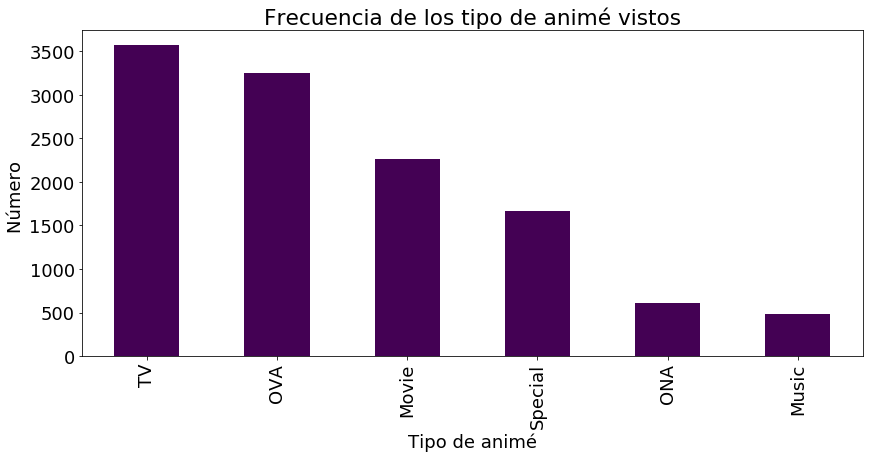

In [30]:
plt.figure(figsize = (14,6))
anime['type'].value_counts().plot(kind='bar', cmap = 'viridis');
plt.title('Frecuencia de los tipo de animé vistos')
plt.xlabel('Tipo de animé')
plt.ylabel('Número ')

* Se observa que los tipos de animé con mayor número de visitas son los del tipo TV, y OVAs (Original Video Animation), mientras que el tipo Music y el tipo ONA son los menos vistos.

#### Top 30 Animés con mejor relación Rating/Members

In [26]:
promedio_rating = anime['rating'].mean()

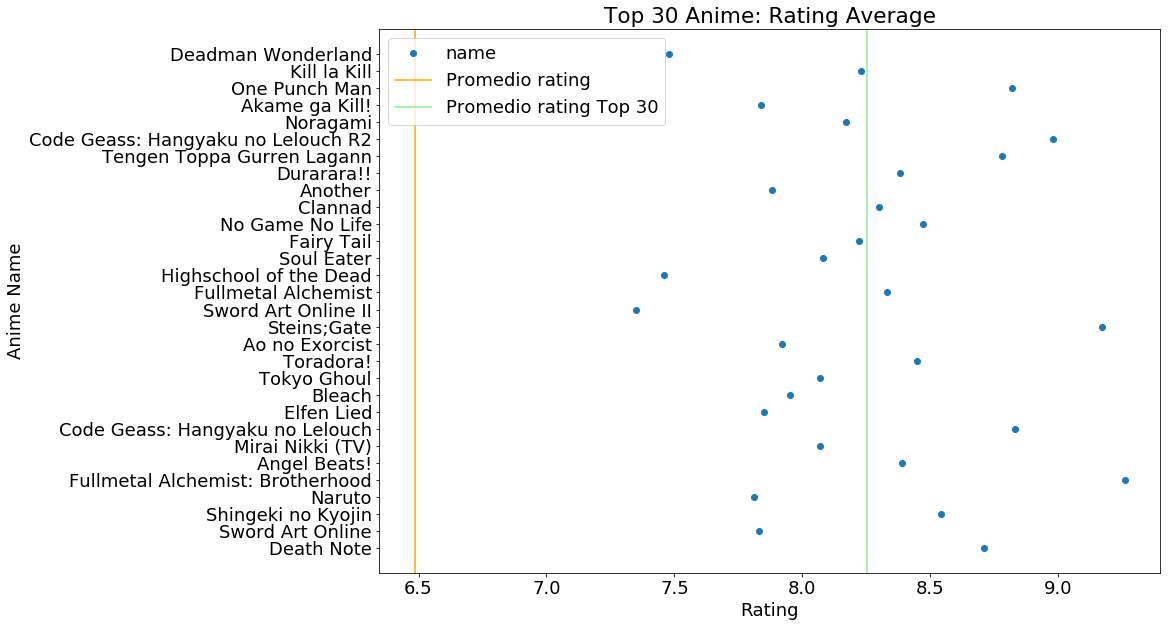

In [71]:
plt.figure(figsize = (14,10))
top = anime.sort_values(by ='ratio', ascending = True).head(30)
promedio_top = top['rating'].mean()
plt.plot(top['rating'], top['name'], 'o')
plt.title('Top 30 Anime: Rating Average')

plt.ylabel('Anime Name')
plt.xlabel('Rating')
plt.axvline(promedio_rating, color = 'orange', label = 'Promedio rating')
plt.axvline(promedio_top, color = 'lightgreen', label = 'Promedio rating Top 30')
plt.legend()
plt.show()

* De los 30 animé con mejor ratio (rating/members), los animé mejor evaluados son :
    * Fullmetal Alchemist: Brotherhood
    * Steins; Gate
    * Code Geass
    * One Punch Man

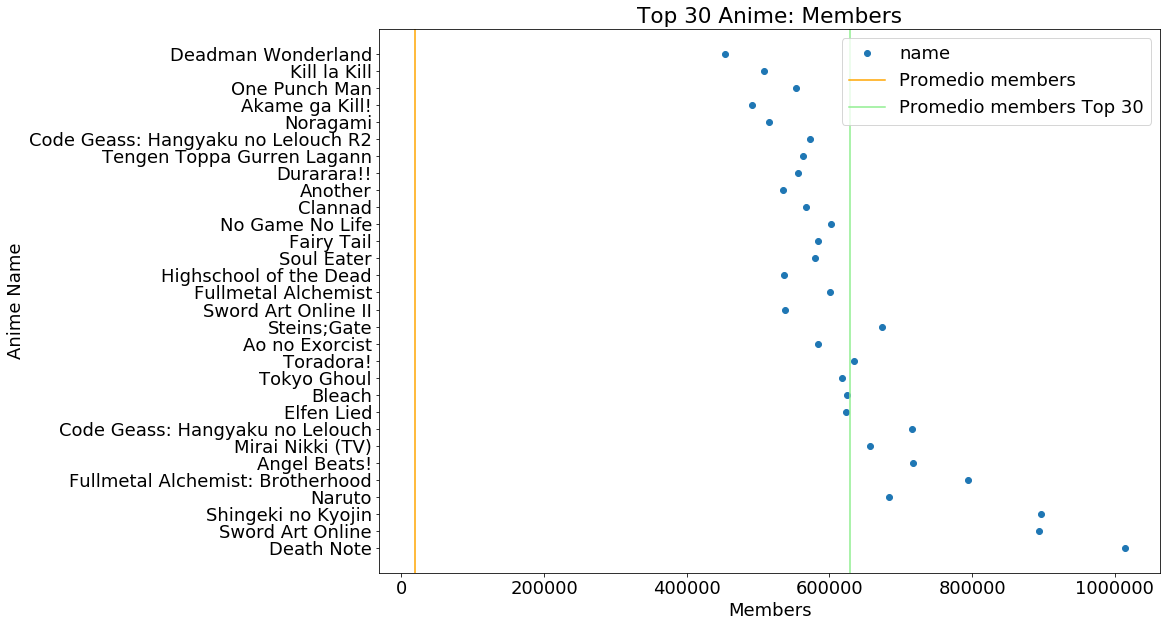

In [32]:
promedio_members = anime['members'].mean()
plt.figure(figsize = (14,10))
top = anime.sort_values(by ='ratio', ascending = True).head(30)
promedio_top = top['members'].mean()
plt.plot(top['members'], top['name'], 'o')
plt.title('Top 30 Anime: Members')

plt.ylabel('Anime Name')
plt.xlabel('Members')
plt.axvline(promedio_members, color = 'orange', label = 'Promedio members')
plt.axvline(promedio_top, color = 'lightgreen', label = 'Promedio members Top 30')
plt.legend()
plt.show()

* De los 30 animés con mejor ratio, los que tienen las comunidades con mayor número de miembros son:
    * Death Note
    * Shingeki no Kyojin
    * Sword Art Online
    * Fullmetal Alchemist: Brotherhood
    * Naruto

### Distribución de las variables

#### Variable episodes

Text(0.5,1,"Distribución de la variable 'episodes'")

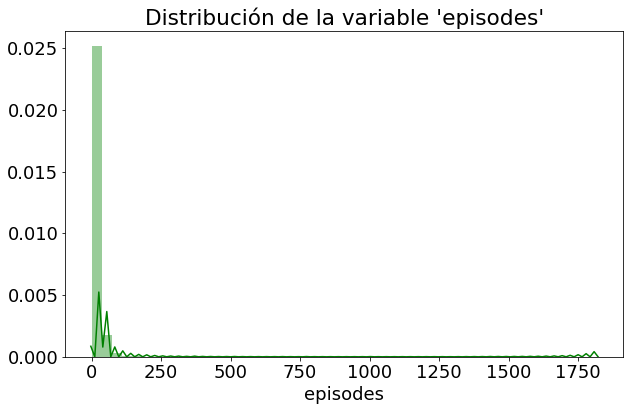

In [33]:
plt.figure(figsize = (10,6))
sns.distplot(anime['episodes'].astype(int), color = 'g')
plt.title('Distribución de la variable \'episodes\'')

#### Variable Rating

Text(0.5,1,"Distribución de la variable 'rating'")

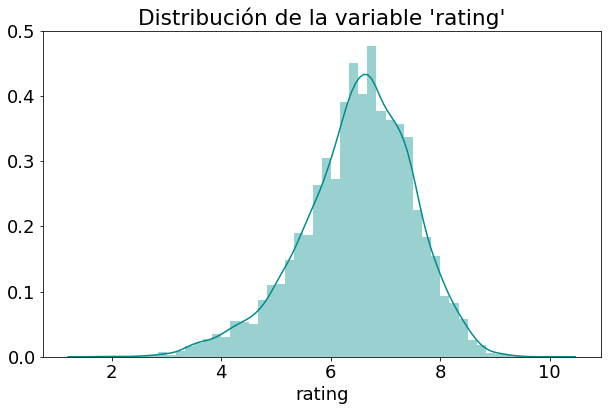

In [34]:
plt.figure(figsize = (10,6))
sns.distplot(anime['rating'], color = 'darkcyan')
plt.title('Distribución de la variable \'rating\'')

#### Variable Members

Text(0.5,1,"Distribución de la variable 'members'")

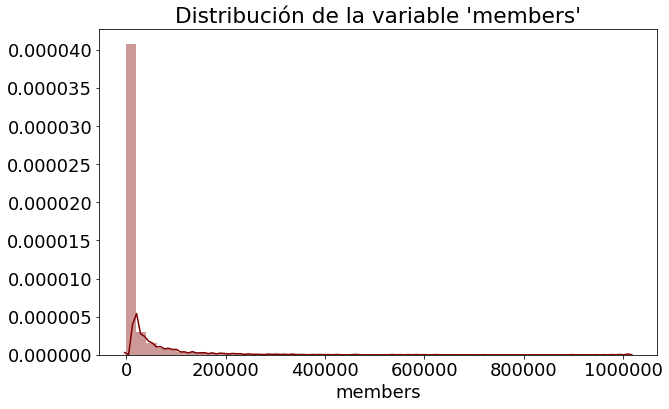

In [35]:
plt.figure(figsize = (10,6))
sns.distplot(anime['members'], color = 'maroon')
plt.title('Distribución de la variable \'members\'')

#### Variable Ratio

Text(0.5,1,'Distribución del ratio (rating/members)')

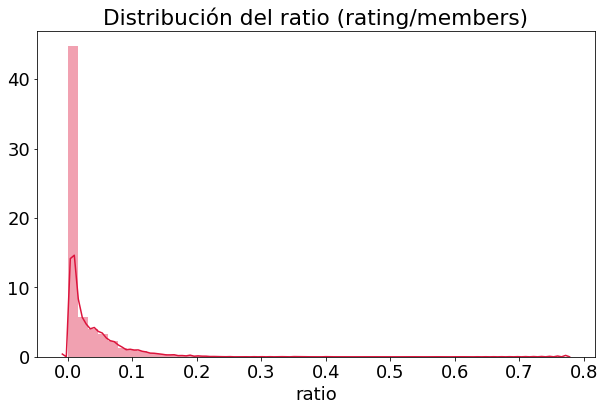

In [36]:
plt.figure(figsize= (10,6))
sns.distplot(anime['ratio'], color = 'crimson')
plt.title('Distribución del ratio (rating/members)')

* De los gráficos de distribuciones, se observa asimetría de la distribución en las variables episodes, members y ratio.
* Respecto a la variable rating, esta presenta una forma semejente a la normal

### Recodificación de la variable 'genre'

* Separo las categorías de animé por comas, para luego dividirlas

In [37]:
anime['genre_list'] = anime['genre'].str.split(',')
genre = anime['genre_list']
genre = genre.sort_values()

* Genero una lista con todas los géneros en los datos

In [38]:
tmp_genre = []
for i in genre:
    if type(i) == list:
        for j in i:
            j = j.strip().replace(' ','_').replace(chr(10),'_').replace('-','_')
            if j not in tmp_genre:
                tmp_genre.append(j)
genre = tmp_genre

In [39]:
print(f"El total de géneros de anime es {len(genre)}")

El total de géneros de anime es 43


* Añado todos los géneros al DataFrame como variables binarias

In [40]:
#for j,value in enumerate(genre):
    #anime[value+ '_gen'] = np.where(anime['genre_list'].apply(lambda x: value in x),1,0)

In [41]:
for j in genre:
    tmp = j.strip().replace(' ','_').replace(chr(10),'_').replace('-','_')
    anime[tmp+'_gen'] = anime['genre'].str.contains(j)
    anime[tmp+'_gen'] = np.where(anime[tmp+'_gen'], 1, 0)

* Elimino las columnas sobrantes

In [42]:
anime = anime.drop(columns=['genre','genre_list'])

In [43]:
anime.sample(5)

anime_id                                               name type  \
4043        179                                   Ultra Maniac OVA  OVA   
10206     30447                                     Shika to Kanta  OVA   
8371      21545               Choubakumatsu Shounen Seiki Takamaru  OVA   
3253      15819  Kindaichi Shounen no Jikenbo: Kuromajutsu Sats...  OVA   
1696       4038                              Zettai Karen Children   TV   

       episodes  rating  members  rating_avg     ratio  Action_gen  \
4043        1.0    6.82     3979        6.82  0.001714           0   
10206       1.0    7.00       47        7.00  0.148936           0   
8371        2.0    6.44       92        6.44  0.070000           1   
3253        2.0    7.04      782        7.04  0.009003           0   
1696       51.0    7.47    25876        7.47  0.000289           1   

       Adventure_gen  ...  Samurai_gen  Hentai_gen  Slice_of_Life_gen  \
4043               0  ...            0           0                  0   
10206              1  ...            0           0                  0   
8371               0  ...            0           0                  0   
3253               0  ...            0           0                  0   
1696               0  ...            0           0                  0   

       Dementia_gen  Thriller_gen  Shoujo_Ai_gen  Josei_gen  Yuri_gen  \
4043              0             0              0          0         0   
10206             0             0              0          0         0   
8371              0             0              0          0         0   
3253              0             0              0          0         0   
1696              0             0              0          0         0   

       Shounen_Ai_gen  Yaoi_gen  
4043                0         0  
10206               0         0  
8371                0         0  
3253                0         0  
1696                0         0  

[5 rows x 51 columns]

### Recodificación de la variable 'type'

* Creo las columnas con los diferentes tipos de animé presentes en los datos

In [44]:
type_anime = list(anime['type'].value_counts().reset_index()['index'])
type_anime

['TV', 'OVA', 'Movie', 'Special', 'ONA', 'Music']

In [45]:
for i in type_anime:
    anime[i+'_type'] = np.where(i == anime['type'], 1, 0)

* Elimino las columnas sobrantes

In [46]:
anime = anime.drop('type', axis=1)

In [47]:
anime.head()

anime_id                              name  episodes  rating  members  \
0     32281                    Kimi no Na wa.       1.0    9.37   200630   
1      5114  Fullmetal Alchemist: Brotherhood      64.0    9.26   793665   
2     28977                          Gintama°      51.0    9.25   114262   
3      9253                       Steins;Gate      24.0    9.17   673572   
4      9969                     Gintama&#039;      51.0    9.16   151266   

   rating_avg     ratio  Action_gen  Adventure_gen  Cars_gen  ...  Josei_gen  \
0        9.37  0.000047           0              0         0  ...          0   
1        9.26  0.000012           1              1         0  ...          0   
2        9.25  0.000081           1              0         0  ...          0   
3        9.17  0.000014           0              0         0  ...          0   
4        9.16  0.000061           1              0         0  ...          0   

   Yuri_gen  Shounen_Ai_gen  Yaoi_gen  TV_type  OVA_type  Movie_type  \
0         0               0         0        0         0           1   
1         0               0         0        1         0           0   
2         0               0         0        1         0           0   
3         0               0         0        1         0           0   
4         0               0         0        1         0           0   

   Special_type  ONA_type  Music_type  
0             0         0           0  
1             0         0           0  
2             0         0           0  
3             0         0           0  
4             0         0           0  

[5 rows x 56 columns]

### Top Categorías con maypr número de series

In [48]:
genero = []
for index, value in anime.iteritems():
    if 'gen' in index:
        genero.append([index,anime[index].sum()])

In [49]:
genres = pd.DataFrame(genero)
genres.columns = ['Genre','Numero']

In [50]:
g = genres.sort_values(by ='Numero', ascending = False ).head(10)['Genre']
n = genres.sort_values(by ='Numero', ascending = False ).head(10)['Numero']

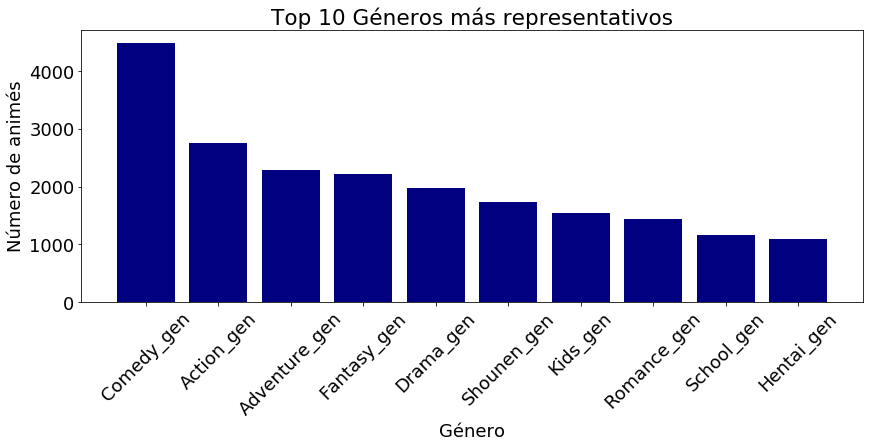

In [74]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize = (14,5))
plt.title('Top 10 Géneros más representativos')
plt.bar(g,n,color="navy")
plt.xticks(rotation = 45)
plt.xlabel('Género')
plt.ylabel('Número de animés')
plt.show()

* Como se puede observar, los géneros Comedy, Action y Adventure son los géneros con mayor recepción por parte del público.

### Top Géneros en base al rating promedio

In [52]:
rating_genero = []
for index, value in genres['Genre'].iteritems():
    promedio = anime[anime[value] == 1]['rating'].mean()
    rating_genero.append([value,promedio])

In [53]:
df_rating_genero = pd.DataFrame(rating_genero)

In [54]:
df_rating_genero.columns = ['Genero','Rating']
df_rating_genero.head(5)

Genero    Rating
0     Action_gen  6.787802
1  Adventure_gen  6.746502
2       Cars_gen  6.461127
3     Comedy_gen  6.639694
4     Sci_Fi_gen       NaN

In [55]:
g2 = df_rating_genero.sort_values(by ='Rating', ascending = False ).head(10)['Genero']
n2 = df_rating_genero.sort_values(by ='Rating', ascending = False ).head(10)['Rating']

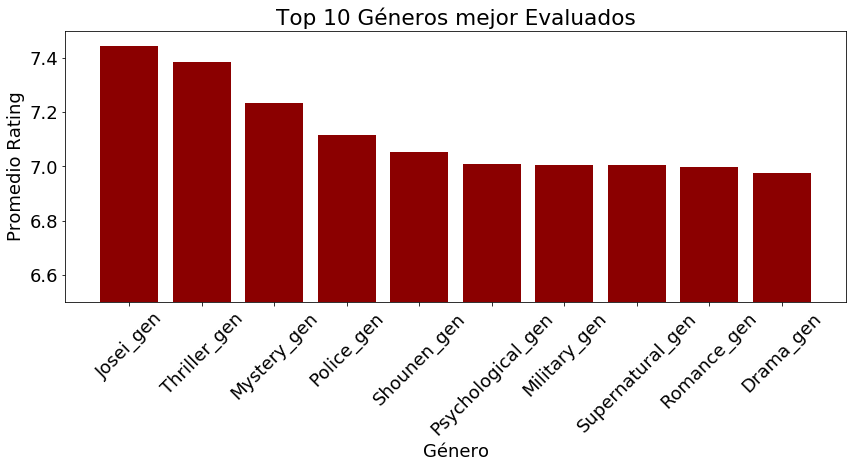

In [73]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize = (14,5))
plt.title('Top 10 Géneros mejor Evaluados')
plt.xlabel('Género')
plt.ylabel('Promedio Rating')
plt.ylim(6.5,7.5)
plt.bar(g2,n2,color="darkred")
plt.xticks(rotation = 45)
plt.show()

* Los géneros con un promedio de rating mejor evaluados son: josei, thriller,mystery y police.

### Top Géneros en base al número de miembros promedio

In [57]:
members_genero = []
for index, value in genres['Genre'].iteritems():
    promedio = anime[anime[value] == 1]['members'].mean()
    members_genero.append([value,promedio])

In [58]:
df_members_genero = pd.DataFrame(members_genero)
df_members_genero.columns = ['Genero','Members Average']
df_members_genero.head(5)

Genero  Members Average
0     Action_gen     33954.439956
1  Adventure_gen     19397.380288
2       Cars_gen      7232.014085
3     Comedy_gen     23441.112425
4     Sci_Fi_gen              NaN

In [59]:
g3 = df_members_genero.sort_values(by ='Members Average', ascending = False ).head(10)['Genero']
n3 = df_members_genero.sort_values(by ='Members Average', ascending = False ).head(10)['Members Average']

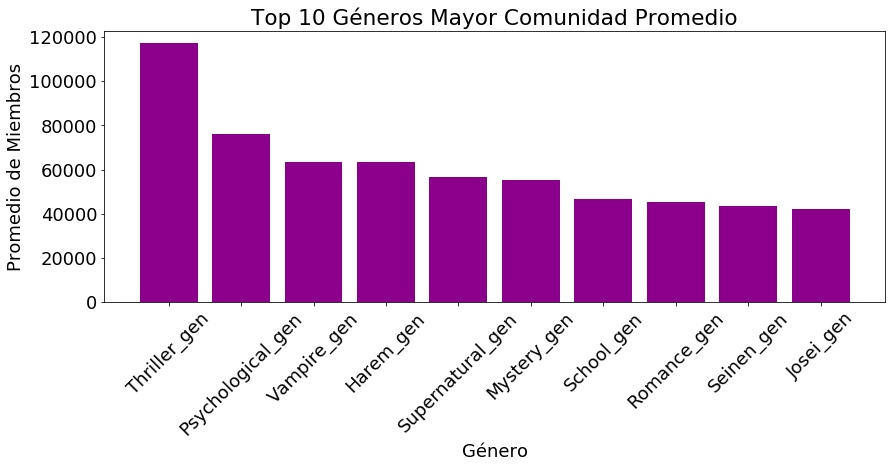

In [72]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize = (14,5))
plt.title('Top 10 Géneros Mayor Comunidad Promedio')
plt.xlabel('Género')
plt.ylabel('Promedio de Miembros')
plt.bar(g3,n3,color="darkmagenta")
plt.xticks(rotation = 45)
plt.show()

* Los géneros con mayor número de miembros promedio son : thriller, psychological y vampire.

### Exportación de los dataset procesados

In [61]:
anime.to_csv('AnimeProcesado.csv')

In [62]:
rating.to_csv('rating_final.csv')